In [ ]:
'''author : vamsi krishna katam
   mail-id : vamsikrishna.katamreddy@gmail.com
'''

In [212]:
# let import the necessay packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [213]:
# loading the data

zomato_data = pd.read_csv(r'C:\Users\vamsi katam\Desktop\CN\Datasets\zomato.csv',encoding='latin-1')

In [214]:
df = zomato_data.copy(deep=True)

In [215]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [216]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [217]:
df['Votes'] = pd.to_numeric(df.Votes)
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'])
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'])

### Question 1 
    The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.
- Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
- Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
- Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
- Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

#### 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [218]:
shape = df.shape[0]

#### cities in Delhi ncr are New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad

In [219]:
india_df = df[df["Country Code"] == 1]

In [220]:
delhi_ncr_df = india_df[(india_df.City == 'New Delhi') | (india_df.City== 'Ghaziabad') | (india_df.City == 'Noida') | (india_df.City == 'Gurgaon')|(india_df.City == 'Faridabad')]

In [221]:
delhi_ncr_res_count = delhi_ncr_df.shape[0]

In [222]:
rest_of_india_df = india_df[(india_df.City != 'New Delhi') & (india_df.City != 'Ghaziabad') & (india_df.City != 'Noida') & (india_df.City != 'Gurgaon') & (india_df.City != 'Faridabad')]

In [223]:
restIndia_res_count = rest_of_india_df.shape[0]

In [224]:
# delhi_ncr = ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']
# cities_wise_rests_count = india_df.groupby(by='City')['Restaurant ID'].count()

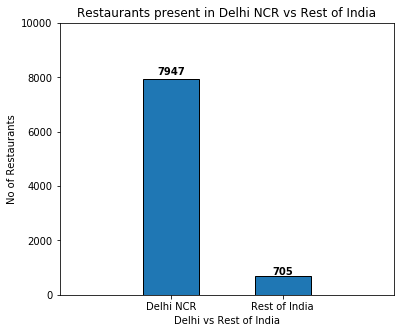

In [225]:
# lets plot the count
x = ['Delhi NCR','Rest of India']
height = [delhi_ncr_res_count,restIndia_res_count]

plt.figure(figsize=(6,5))
plt.bar(x=x, height = height,
        edgecolor = 'black',
        width = 0.5,
        align = 'center')
plt.title('Restaurants present in Delhi NCR vs Rest of India')
for i,j in zip(x,height): 
    plt.text(i,j*1.02,j,fontweight= 'bold',color='black',ha='center')  # to place the value on top of each bar

plt.axis([-1,2,0,10000])
plt.xlabel("Delhi vs Rest of India")
plt.ylabel("No of Restaurants")   
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\fig1.png",dpi=150)
plt.show()

#### 1.2 
    Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [226]:
delhi_cuisines = set()

for i in delhi_ncr_df.Cuisines:
    i = i.split(',')
    for j in i:
        j = j.strip()
        delhi_cuisines.add(j)

In [227]:
rest_of_india_cuisines = set()

for i in rest_of_india_df.Cuisines:
    i = i.split(",")
    for j in i :
        j = j.strip()
        rest_of_india_cuisines.add(j)

In [228]:
print(len(delhi_cuisines))
print(len(rest_of_india_cuisines))

86
70


In [229]:
non_delhi_ncr_cuisines = rest_of_india_cuisines.difference(delhi_cuisines)  # taking the difference of rest of india cuisines 

In [230]:
for i in non_delhi_ncr_cuisines:
    print(i,end=', ')

German, Malwani, Cajun, BBQ, 

##### As per the dataset the Cuisines which are not being served in the Delhi Restaurants are :
#### "Malwani, BBQ, Cajun, German"

#### lets check whether these cuisines are not in Delhi or is that just incomplete dataset

In [231]:
import requests 

access_token = '399720f6f904f106e162cd2bd0011a6f'

data = {'city_id':1}
header = {'Accept': 'application/json','User_Key': access_token}
url = 'https://developers.zomato.com/api/v2.1/cuisines'
zom_resp = requests.get(url,headers=header,params = data)
# print(zom_resp.status_code)

cuisines_data = zom_resp.json()

In [232]:
for i in cuisines_data['cuisines']:
    cuisine_name = i['cuisine']['cuisine_name']
    if cuisine_name in non_delhi_ncr_cuisines:
        print(cuisine_name,end=" ")

BBQ Malwani 

##### As we can see form the above search on API, the cuisines BBQ, Malwani, are actually being served in the Delhi NCR cities restaurants
#### Hence, We can conclude that the dataset is incomplete 

### 1.3
    Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [233]:
def get_top_ten_cuisines(values):
    cuisines = {}
    for i in values:
        for j in i.split(','):
            j = j.strip()
            cuisines[j] = cuisines.get(j,0)+1
    top_ten_cuisines = pd.Series(cuisines)
    top_ten_cuisines.sort_values(ascending=False,inplace=True)
    return top_ten_cuisines[:10]

In [234]:
top_ten_cuisines = get_top_ten_cuisines(india_df.Cuisines.values)

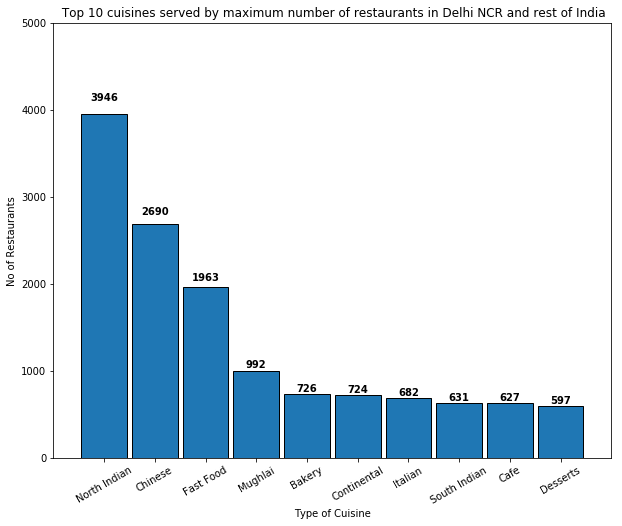

In [235]:
indexes = top_ten_cuisines.index
values = top_ten_cuisines.values
plt.figure(figsize=(10,8))
plt.bar(indexes,values,width = 0.9,edgecolor = 'black')
plt.xticks(rotation=30)
plt.axis([-1,10,0,5000])
for i,j in zip(indexes,values):
    plt.text(i,j*1.04,j,fontweight='bold',ha='center')
plt.title(" Top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India")
plt.xlabel("Type of Cuisine")
plt.ylabel("No of Restaurants")
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\fig2.png",dpi=150)
plt.show()

#### Top Ten Cuisines that were served in restaurants of Delhi and Rest of India are

#### North Indian, Chinese, Mughlai, Continental, South Indian, Cafe, Desserts, European, Rajasthani, Gujarati, 

In [236]:
# top ten cuisines in Delhi NCR
get_top_ten_cuisines(delhi_ncr_df.Cuisines.values) 

North Indian    3597
Chinese         2448
Fast Food       1866
Mughlai          933
Bakery           697
South Indian     569
Continental      547
Desserts         542
Street Food      538
Italian          535
dtype: int64

In [237]:
# top ten cuisines in Rest of the India
get_top_ten_cuisines(rest_of_india_df.Cuisines.values)

North Indian    349
Chinese         242
Continental     177
Italian         147
Cafe            136
Fast Food        97
South Indian     62
Mughlai          59
Desserts         55
Mexican          50
dtype: int64

### 1.4 
    Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

In [238]:
delhi_ncr_top_ten_cuisines = get_top_ten_cuisines(delhi_ncr_df.Cuisines.values) 

In [239]:
rest_of_india_top_ten_cuisines = get_top_ten_cuisines(rest_of_india_df.Cuisines.values)

In [240]:
def plot_pie(series):
    plt.figure(figsize=(8,7))
    plt.bar(series.index,series.values)
    plt.title("Top 10 Cuisines Served in Delhi NCR cities Restaurants ")
    plt.xlabel('Cuisine Name')
    plt.xticks(rotation = 30)
#     plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\fig3_top-10-cuisines-in-Delhi_NCR.png",dpi=150)
    plt.show()

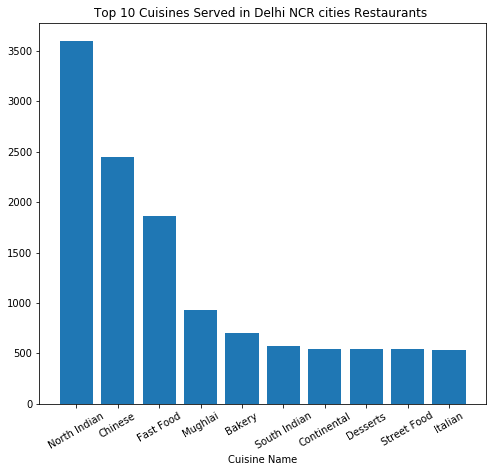

In [241]:
plot_pie(delhi_ncr_top_ten_cuisines)

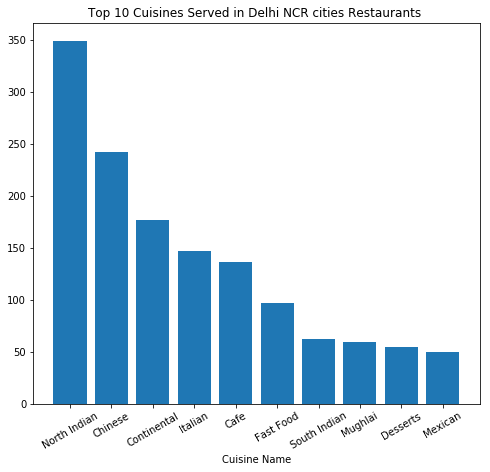

In [242]:
plot_pie(rest_of_india_top_ten_cuisines)

### Question 2:
    User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
1. Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
    - Number of Votes given Restaurant
    - Restaurant serving more number of cuisines.
    - Average Cost of Restaurant
    - Restaurant serving some specific cuisines.
2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
    - Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [243]:
india_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71


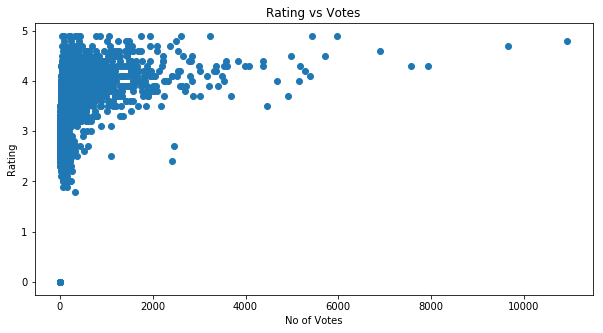

In [244]:
# df_temp = india_df[['Aggregate rating','Votes']]

x = india_df['Votes']
y = india_df['Aggregate rating']

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title('Rating vs Votes')
plt.xlabel('No of Votes')
plt.ylabel('Rating')
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\rating_vs_votes.png",dpi=150)
plt.show()

#### Restaurant serving more number of cuisines.

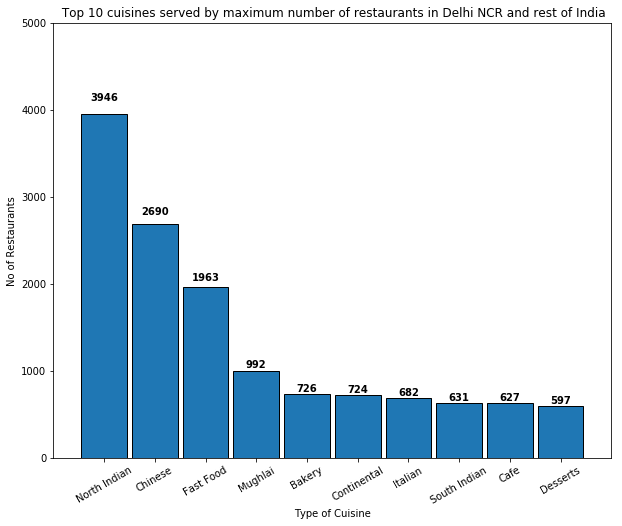

In [245]:
indexes = top_ten_cuisines.index
values = top_ten_cuisines.values
plt.figure(figsize=(10,8))
plt.bar(indexes,values,width = 0.9,edgecolor = 'black')
plt.xticks(rotation=30)
plt.axis([-1,10,0,5000])
for i,j in zip(indexes,values):
    plt.text(i,j*1.04,j,fontweight='bold',ha='center')
plt.title(" Top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India")
plt.xlabel("Type of Cuisine")
plt.ylabel("No of Restaurants")
plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\fig2.png",dpi=150)
plt.show()

In [246]:
india_df['Cuisines_Count'] = india_df.Cuisines.apply(lambda x : len(x.split(",")))
cuisines_count = india_df.Cuisines_Count.value_counts().index

cuisines_rating = {}
for i in cuisines_count:
    w = india_df.loc[india_df.Cuisines_Count == i]
    r = w['Aggregate rating'].sum()
    aggr_r = round(r/w.shape[0],2)
    cuisines_rating[i] = cuisines_rating.get(i,aggr_r)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [247]:
cuisines_rating

{2: 2.56, 1: 2.06, 3: 2.89, 4: 3.38, 5: 3.48, 6: 3.65, 7: 3.65, 8: 3.27}

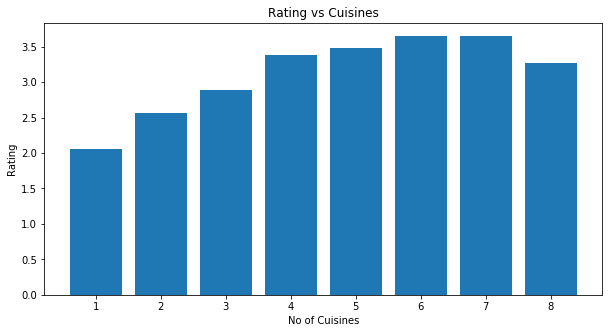

In [248]:
# df_temp = india_df[['Aggregate rating','Votes']]

x = list(cuisines_rating.keys())
y = list(cuisines_rating.values())

plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('Rating vs Cuisines')
plt.xlabel('No of Cuisines')
plt.ylabel('Rating')
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\rating_vs_cuisines.png",dpi=150)
plt.show()

#### Average Cost of Restaurant

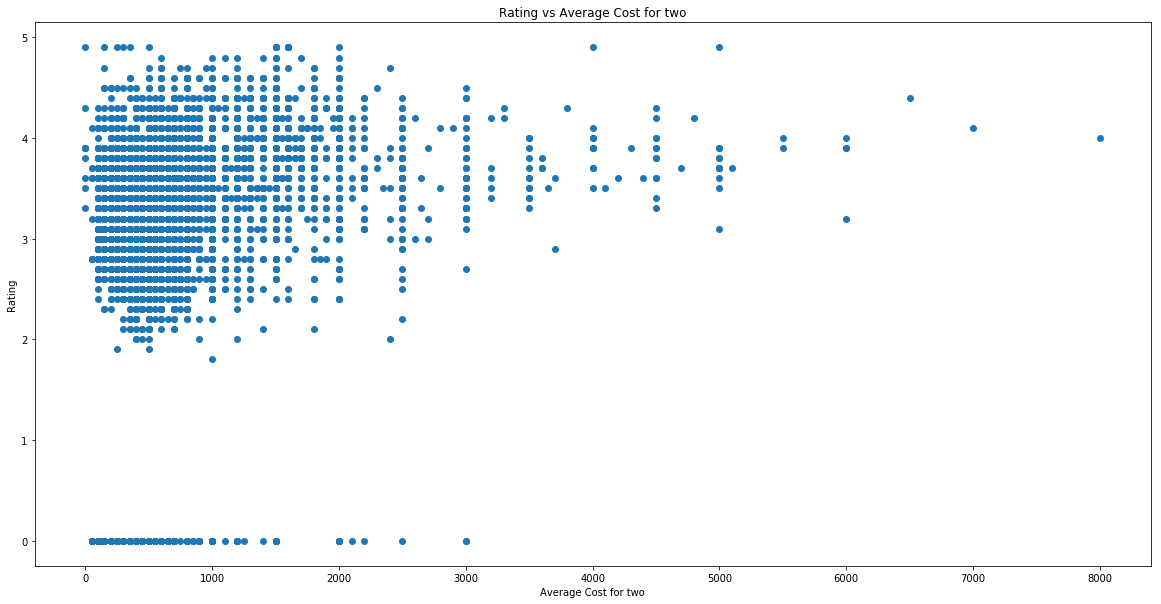

In [249]:
x = list(india_df['Average Cost for two'])
y = list(india_df['Aggregate rating'])

plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.title('Rating vs Average Cost for two')
plt.xlabel('Average Cost for two')
plt.ylabel('Rating')
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\rating_vs_average_cost_for_two.png",dpi=150)
plt.show()

#### Restaurant serving some specific cuisines.

In [250]:
def get_top_fifteen_cuisines(values):
    cuisines = {}
    for i in values:
        for j in i.split(','):
            j = j.strip()
            cuisines[j] = cuisines.get(j,0)+1
    top_fifteen_cuisines = pd.Series(cuisines)
    top_fifteen_cuisines.sort_values(ascending=False,inplace=True)
    return top_fifteen_cuisines[:15]

In [251]:
top_cuisines_in_india = get_top_fifteen_cuisines(india_df.Cuisines.values).reset_index()
top_cuisines_in_india.columns = ['Cuisines','Count']
# print(top_cuisines_in_india)
print("_"*22,"Top 10 Cuisines in india","_"*22)
for i in top_cuisines_in_india.values:
    print("{:<35s} | {:>15}".format(i[0],i[1]))
print("_"*70)

______________________ Top 10 Cuisines in india ______________________
North Indian                        |            3946
Chinese                             |            2690
Fast Food                           |            1963
Mughlai                             |             992
Bakery                              |             726
Continental                         |             724
Italian                             |             682
South Indian                        |             631
Cafe                                |             627
Desserts                            |             597
Street Food                         |             554
Mithai                              |             380
Pizza                               |             313
American                            |             225
Ice Cream                           |             216
______________________________________________________________________


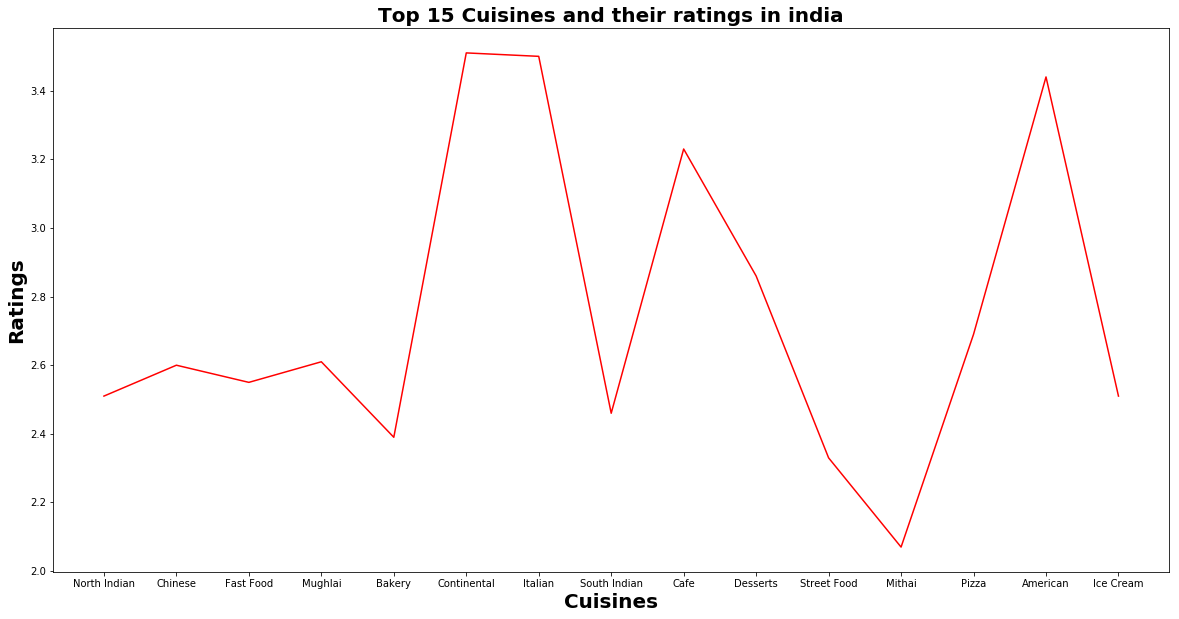

In [252]:
df_temp = india_df[['Cuisines','Aggregate rating']]
cuisines_agg_rat = {}
for i in range(15):
    count = top_cuisines_in_india.Count.values[i]
    cuisine = top_cuisines_in_india.Cuisines.values[i]
    sum = 0
#     print(cuisine,count)
    for j in df_temp.values:
        if cuisine in j[0]:
            sum += j[1]
    
    cuisines_agg_rat[cuisine] = round((sum/count),2)
    
## ploting 
labels = list(cuisines_agg_rat.keys())
ratings = list(cuisines_agg_rat.values())

plt.figure(figsize=(20,10))
plt.plot(labels,ratings,color = 'red')
plt.title('Top 15 Cuisines and their ratings in india',fontdict={'weight':'bold','size': 20})
plt.xlabel('Cuisines',fontdict={'weight':'bold','size': 20})
plt.ylabel('Ratings',fontdict={'weight':'bold','size': 20})
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\top_15_cuisines_ratings_india.png",dpi=150)
plt.show()

### Question 2.2
    Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
- Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [253]:
# lets check where there are any nan values
print(df.Votes.isnull().sum())
print(df['Aggregate rating'].isnull().sum())

0
0


In [254]:
df_india =  df[df["Country Code"] == 1]

In [255]:
df_india.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [256]:
example = df_india.loc[df_india.Locality == 'Agra Cantt',['Aggregate rating','Votes']]
votes_into_rating = (example.Votes * example['Aggregate rating']).sum()
votes_into_rating / example.Votes.sum()

3.714426229508197

In [257]:
df_india['weighted_average'] = df_india['Aggregate rating'] * df_india['Votes']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [258]:
localities = df_india.Locality.unique()
localities_vs_rating = {}

In [259]:
for i in localities:
    df_temp = df_india.loc[df_india.Locality == i ,['weighted_average','Votes']]
    weighted_sum = df_temp.weighted_average.sum()
    votes_sum = df_temp.Votes.sum()
    if votes_sum == 0:
        weighted_rat = 0
    else:
        weighted_rat = weighted_sum/votes_sum
    localities_vs_rating[i] = localities_vs_rating.get(i,weighted_rat)

In [260]:
top_ten_localities_and_ratings = sorted(localities_vs_rating.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)[:10]

In [261]:
print("_"*35," Top 10 rated Localities are ","_"*35)
print("-"*101)
x = []
y = []
for i in top_ten_localities_and_ratings:
    x.append(i[0])
    y.append(i[1])
    print('{:<40s}|{:>10s}{:.2f}'.format(i[0],"",i[1]))
print("-"*101)

___________________________________  Top 10 rated Localities are  ___________________________________
-----------------------------------------------------------------------------------------------------
Hotel Clarks Amer, Malviya Nagar        |          4.90
Aminabad                                |          4.90
Friends Colony                          |          4.89
Powai                                   |          4.84
Kirlampudi Layout                       |          4.82
Express Avenue Mall,  Royapettah        |          4.80
Deccan Gymkhana                         |          4.80
Banjara Hills                           |          4.72
Sector 5, Salt Lake                     |          4.71
Riverside Mall, Gomti Nagar             |          4.70
-----------------------------------------------------------------------------------------------------


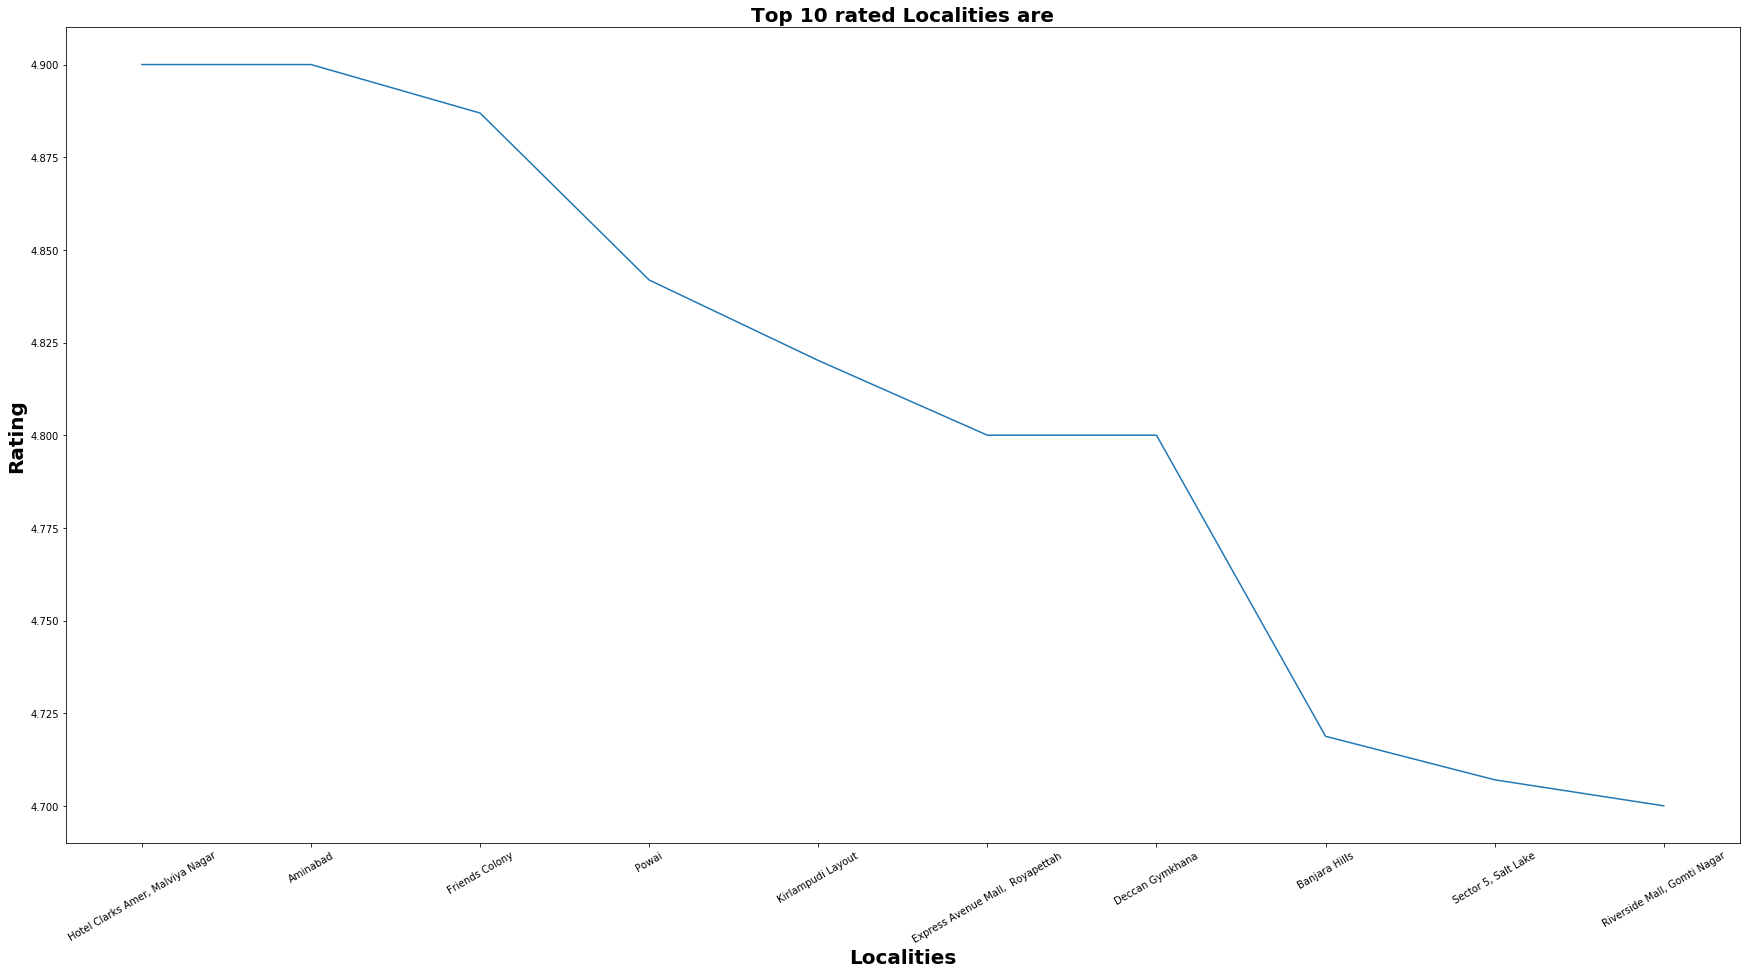

In [262]:
## Lets have a look into the plots
plt.figure(figsize = (30,15))
plt.plot(x ,y)
plt.xticks(rotation = 30)
# plt.axis([0,10,4,5])
plt.title('Top 10 rated Localities are',fontdict={'weight':'bold','size': 20})
plt.xlabel('Localities',fontdict={'weight':'bold','size': 20})
plt.ylabel('Rating',fontdict={'weight':'bold','size': 20})
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\top_10_rated_localities.png",dpi=150)
plt.show()

### Question 3 :
    Visualization
- Plot the bar graph top 15 restaurants have a maximum number of outlets.
- Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
- Plot the bar graph top 10 restaurants in the data with the highest number of votes.
- Plot the pie graph of top 10 cuisines present in restaurants in the USA.
- Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

### 3.1
    Plot the bar graph top 15 restaurants have a maximum number of outlets.

In [263]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [264]:
top_15_rest_with_max_outlets = df['Restaurant Name'].value_counts()[:15]

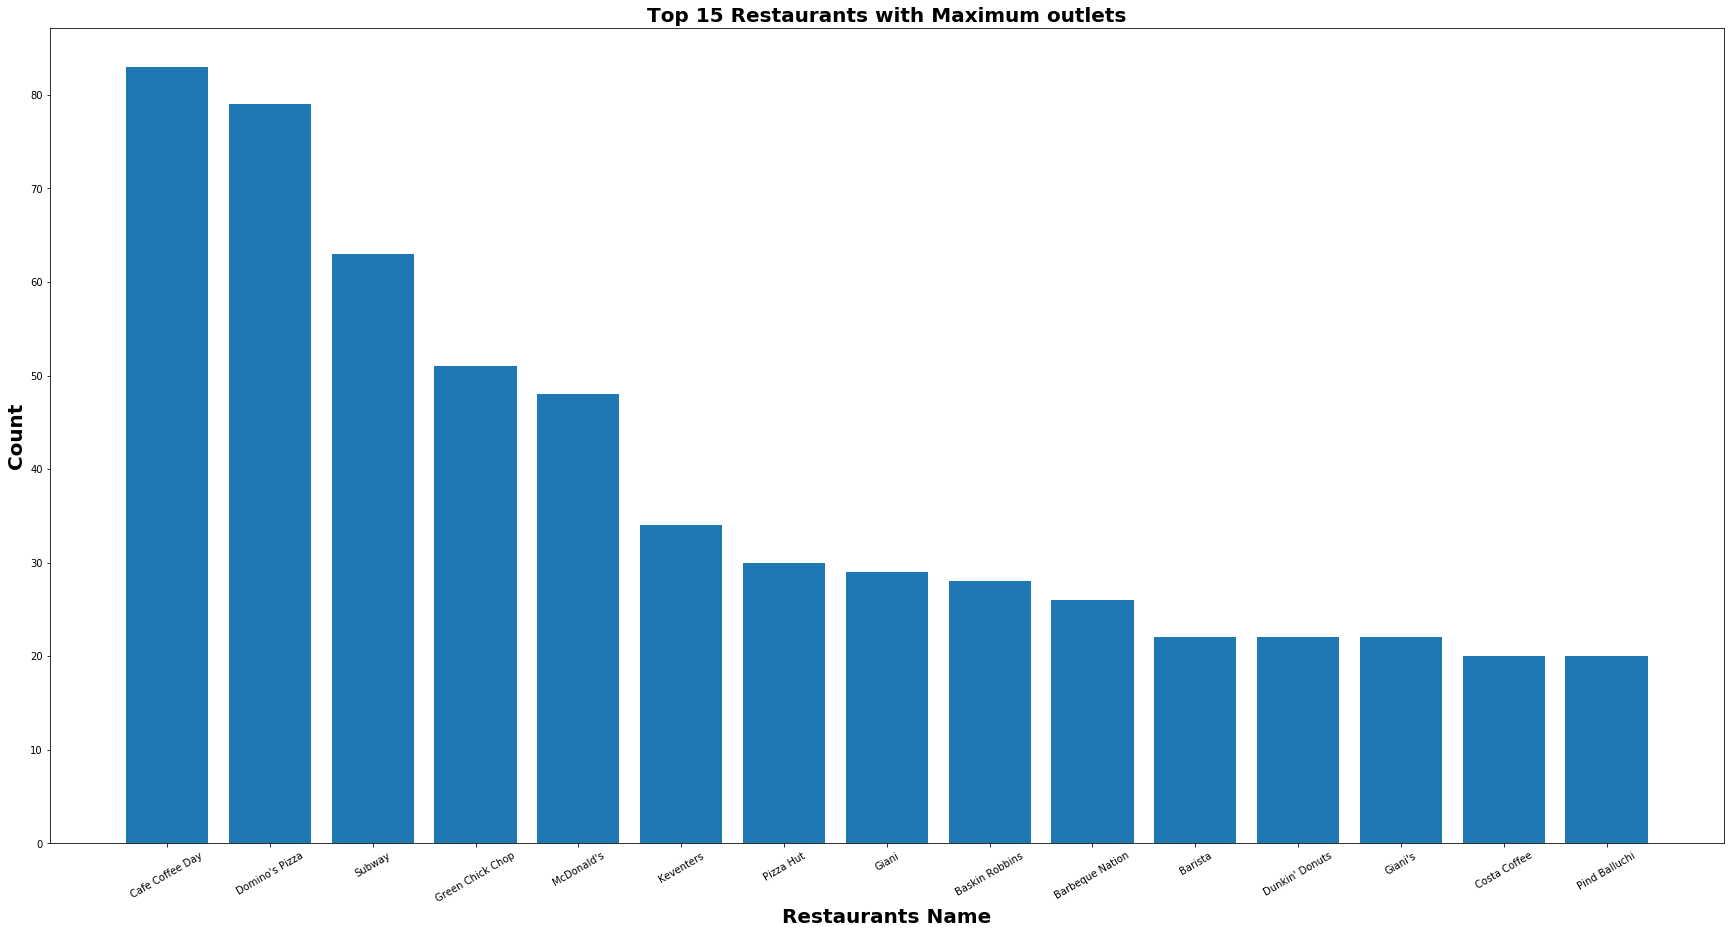

In [265]:
x = top_15_rest_with_max_outlets.index
y = top_15_rest_with_max_outlets.values
plt.figure(figsize=(30,15))
plt.bar(x,y)
plt.xticks(rotation = 30)
plt.title('Top 15 Restaurants with Maximum outlets',fontdict={'weight':'bold','size': 20})
plt.xlabel('Restaurants Name',fontdict={'weight':'bold','size': 20})
plt.ylabel('Count',fontdict={'weight':'bold','size': 20})
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\top_15_rest_with_max_outlets.png",dpi=150)
plt.show()

In [266]:
print(top_15_rest_with_max_outlets.index)

Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation', 'Barista', 'Dunkin' Donuts', 'Giani's',
       'Costa Coffee', 'Pind Balluchi'],
      dtype='object')


### 3.2
    Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

In [267]:
agg_rating_of_rest = df.loc[df['Aggregate rating'] != 0,'Aggregate rating']

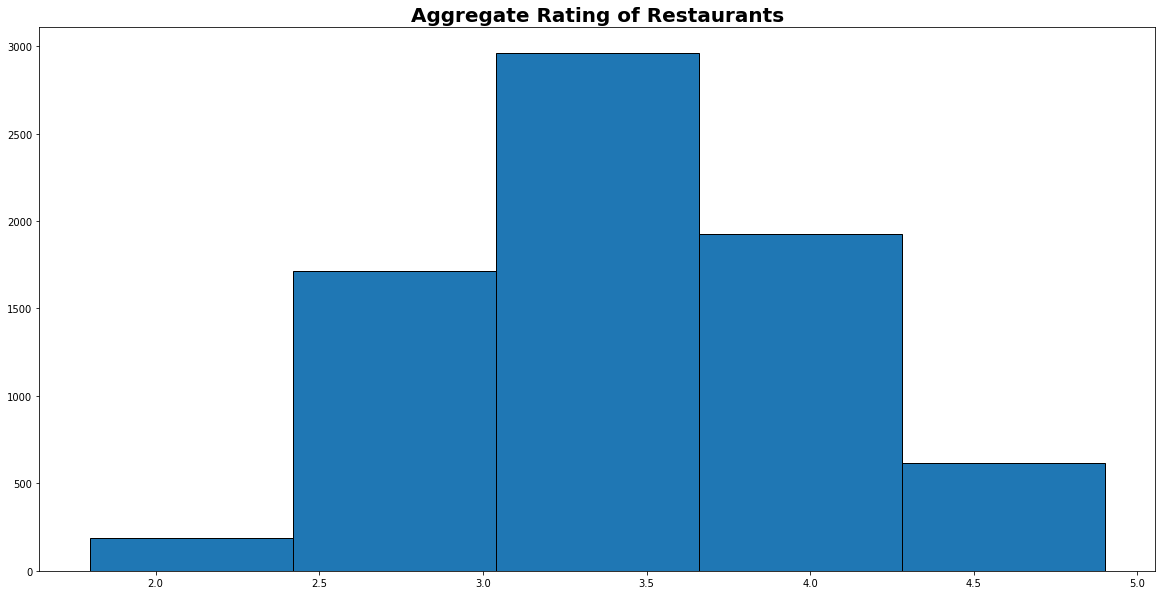

In [268]:
plt.figure(figsize=(20,10))
plt.hist(agg_rating_of_rest,edgecolor = 'black',bins=5)
plt.title('Aggregate Rating of Restaurants',fontdict={'weight':'bold','size': 20})
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\aggregate_rating_of_rest.png",dpi=150)
plt.show()

In [269]:
# lets calculate the bin value
agg_rating_of_rest.max()-agg_rating_of_rest.min()/10

4.720000000000001

### 3.3
    Plot the bar graph top 10 restaurants in the data with the highest number of votes.

In [270]:
df1 = df[df.Votes != 0]

In [271]:
top_10_highest_voted_rest = df.groupby(by='Restaurant Name')['Votes'].sum().sort_values(ascending = False)[:10]

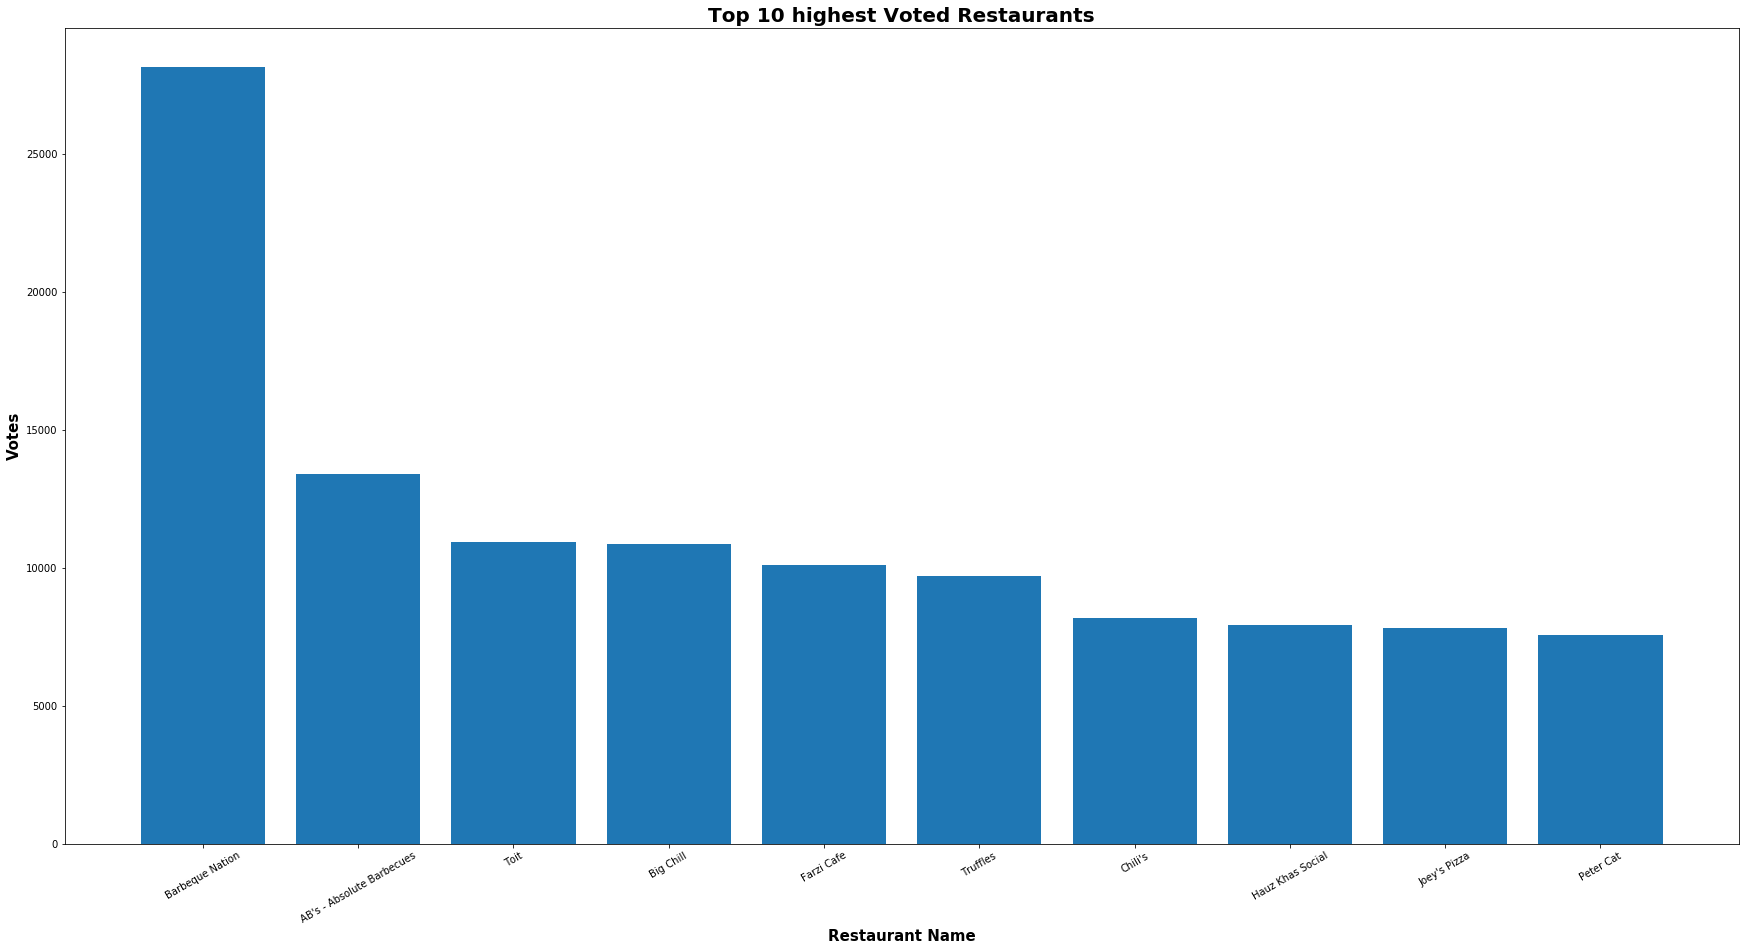

In [272]:
x = top_10_highest_voted_rest.index
y = top_10_highest_voted_rest.values

plt.figure(figsize=(30,15))
plt.bar(x,y)
plt.title('Top 10 highest Voted Restaurants',fontdict={'weight':'bold','size':20})
plt.xlabel('Restaurant Name',fontdict={'weight':'bold','size':15})
plt.ylabel('Votes',fontdict={'weight':'bold','size':15})
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\top_10_rest_with_highest_votes.png",dpi=150)
plt.xticks(rotation = 30)
plt.show()

In [273]:
x

Index(['Barbeque Nation', 'AB's - Absolute Barbecues', 'Toit', 'Big Chill',
       'Farzi Cafe', 'Truffles', 'Chili's', 'Hauz Khas Social', 'Joey's Pizza',
       'Peter Cat'],
      dtype='object', name='Restaurant Name')

### 3.4
    Plot the pie graph of top 10 cuisines present in restaurants in the USA.

In [274]:
df_usa = df[df['Country Code'] == 216]

In [275]:
df_usa = df_usa[df_usa['Restaurant Name'] != ""]

In [276]:
df_usa = df_usa[~df_usa.Cuisines.isna()]
df_usa.shape

(425, 21)

In [277]:
usa_cuisines = {}
for i in df_usa.Cuisines.values:
    if i != "":
        i_spt = i.split(",")
        for j in i_spt:
            j = j.strip()
            usa_cuisines[j] = usa_cuisines.get(j,0)+1

In [278]:
top_10_cuisines_in_usa = sorted(usa_cuisines.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)[:10]

__________ Top 10 Cuisines in USA are __________
American            |          112
Seafood             |          59
Sandwich            |          49
Pizza               |          49
Burger              |          49
Steak               |          42
Italian             |          38
Breakfast           |          37
Mexican             |          36
Sushi               |          34


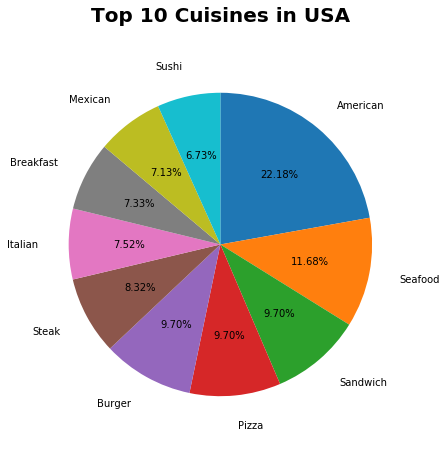

In [279]:
print("_"*10,"Top 10 Cuisines in USA are","_"*10)
labels = []
values = []
for i in top_10_cuisines_in_usa:
    label = i[0]
    value = i[1]
    print('{:<20s}|{:>10s}{}'.format(label,"",value))
    labels.append(label)
    values.append(value)
plt.figure(figsize=(6,8))
plt.pie(values,labels=labels,labeldistance=1.2,autopct="%.2f%%",counterclock=False,startangle=90)
plt.axis("equal")
plt.title('Top 10 Cuisines in USA',fontdict={'weight':'bold','size':20})
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\top_10_cuisines_in_usa.png",dpi=150)
plt.show()

In [280]:
print(labels)

['American', 'Seafood', 'Sandwich', 'Pizza', 'Burger', 'Steak', 'Italian', 'Breakfast', 'Mexican', 'Sushi']


### 3.5
    Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [281]:
cities_count = df_india.City.value_counts()
cities_wrr = {}
for i in cities_count.index:
    weighted_average = df_india[df_india.City == i]['weighted_average'].sum()
    votes_agg = df_india.loc[df_india.City == i,['Votes']].sum()
    weighted_average_rating = weighted_average/votes_agg[0]
    cities_wrr[i] = cities_wrr.get(i,weighted_average_rating)

In [282]:
wrr = list(cities_wrr.values())
x = list(cities_count.index)
y = list(cities_count.values)

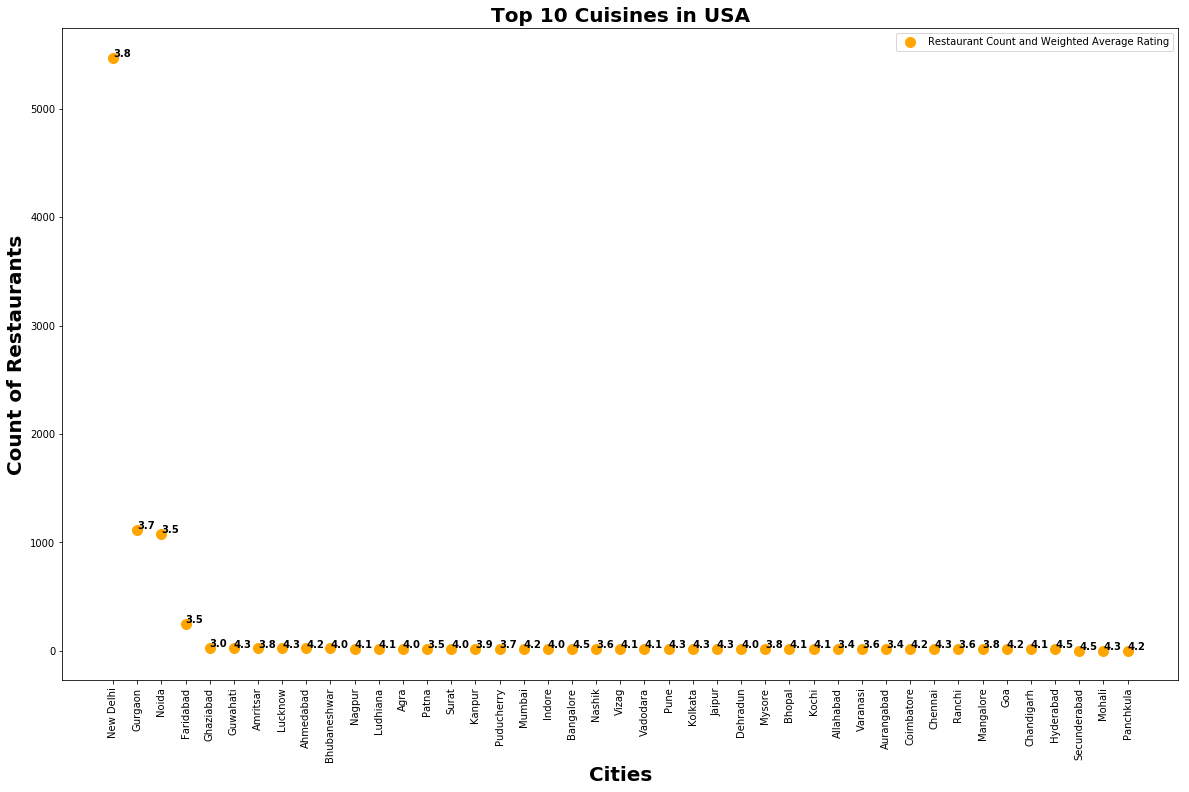

In [283]:
plt.figure(figsize=(20,12))
plt.scatter(x = x,y=y,s=100,c='orange',label='Restaurant Count and Weighted Average Rating')
plt.xticks(rotation= 90)
for i in range(len(x)):
    plt.text(x[i],y[i]+10,round(wrr[i],1),fontdict={'weight':'bold'})
    
plt.title('Top 10 Cuisines in USA',fontdict={'weight':'bold','size':20})
plt.xlabel('Cities',fontdict={'weight':'bold','size':20})
plt.ylabel('Count of Restaurants',fontdict={'weight':'bold','size':20})
plt.legend()
# plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Zomato API - Project II\rest_count_in_each_city_india.png",dpi=150)
plt.show()